In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.roach.heterodyne
from kid_readout.utils import sweeps

In [3]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne(adc_valon='/dev/ttyUSB0')

In [4]:
resonances = np.array([
        1126.7, #probably unusable
    1138.86,
        1144.88,
        1149.78,
        1156.7,
        1163.0,
        1170.1,
        1173.6,
        1178.9,
        1185.0,
        1195.0,
        1204.4,
        1208.5,
        1246.2,
        1248.25, #barely there
        1258.81, 
        1262.7,
        1265.2, #very shallow
        1272.3, #start of ~4 resonator complex
#        1273.4,
#        1274.2,
        1274.8,
        1291.75,
#        1292.7,
        1293.7,
        1301.8,
        1302.9,
        1314.4,
        1315.7,
        1320.3,
        1324.3,
        1330.9,
        1334.6,
        1343.5,
        1352.4,
        
])

In [5]:
resonances.ptp()

225.70000000000005

In [6]:
resonances.mean()

1245.3103125

In [7]:
ri.set_lo(1240.0)

f0s = resonances#np.load('/data/readout/resonances/2015-11-22-jpl-dual-pol-soi-set-of-16.npy')

suffix = "mmw_frequency_sweep"
#mmw_source_modulation_freq = ri.set_modulation_output(rate=7)
#mmw_atten_turns = (7.0, 7.0)
#print "modulating at: {}".format(mmw_source_modulation_freq),

nf = len(f0s)
atonce = 16
if nf % atonce > 0:
    print "extending list of resonators to make a multiple of ", atonce
    f0s = np.concatenate((f0s, np.arange(1, 1 + atonce - (nf % atonce)) + f0s.max()))

nsamp = 2**15
step = 1
nstep = 64
f0binned = np.round(f0s * nsamp / 512.0) * 512.0 / nsamp
offset_bins = np.arange(-(nstep + 1), (nstep + 1)) * step

offsets = offset_bins * 512.0 / nsamp

print f0s
print offsets * 1e6
print len(f0s)

mmw_freqs = np.linspace(140e9, 165e9, 500)

use_fmin = False
attenlist = [30]
for atten in attenlist:
    print "setting attenuator to", atten
    ri.set_dac_attenuator(atten)
    measured_freqs = sweeps.prepare_sweep(ri, f0binned, offsets, nsamp=nsamp)


[ 1126.7   1138.86  1144.88  1149.78  1156.7   1163.    1170.1   1173.6
  1178.9   1185.    1195.    1204.4   1208.5   1246.2   1248.25  1258.81
  1262.7   1265.2   1272.3   1274.8   1291.75  1293.7   1301.8   1302.9
  1314.4   1315.7   1320.3   1324.3   1330.9   1334.6   1343.5   1352.4 ]
[-1015625. -1000000.  -984375.  -968750.  -953125.  -937500.  -921875.
  -906250.  -890625.  -875000.  -859375.  -843750.  -828125.  -812500.
  -796875.  -781250.  -765625.  -750000.  -734375.  -718750.  -703125.
  -687500.  -671875.  -656250.  -640625.  -625000.  -609375.  -593750.
  -578125.  -562500.  -546875.  -531250.  -515625.  -500000.  -484375.
  -468750.  -453125.  -437500.  -421875.  -406250.  -390625.  -375000.
  -359375.  -343750.  -328125.  -312500.  -296875.  -281250.  -265625.
  -250000.  -234375.  -218750.  -203125.  -187500.  -171875.  -156250.
  -140625.  -125000.  -109375.   -93750.   -78125.   -62500.   -46875.
   -31250.   -15625.        0.    15625.    31250.    46875.    62500.

In [9]:
swp = sweeps.do_prepared_sweep(ri,nchan_per_step=32)

 0.0 0.8 1.5 2.3 3.1 3.8 4.6 5.4 6.2 6.9 7.7 8.5 9.2 10.0 10.8 11.5 12.3 13.1 13.8 14.6 15.4 16.2 16.9 17.7 18.5 19.2 20.0 20.8 21.5 22.3 23.1 23.8 24.6 25.4 26.2 26.9 27.7 28.5 29.2 30.0 30.8 31.5 32.3 33.1 33.8 34.6 35.4 36.2 36.9 37.7 38.5 39.2 40.0 40.8 41.5 42.3 43.1 43.8 44.6 45.4 46.2 46.9 47.7 48.5 49.2 50.0 50.8 51.5 52.3 53.1 53.8 54.6 55.4 56.2 56.9 57.7 58.5 59.2 60.0 60.8 61.5 62.3 63.1 63.8 64.6 65.4 66.2 66.9 67.7 68.5 69.2 70.0 70.8 71.5 72.3 73.1 73.8 74.6 75.4 detected mcnt overflow None 81778 0 65536 0 480 81778
76.2 76.9 77.7 78.5 79.2 80.0 80.8 81.5 82.3 83.1 83.8 84.6 85.4 86.2 86.9 87.7 88.5 89.2 90.0 90.8 91.5 92.3 93.1 93.8 94.6 95.4 96.2 96.9 97.7 98.5 99.2


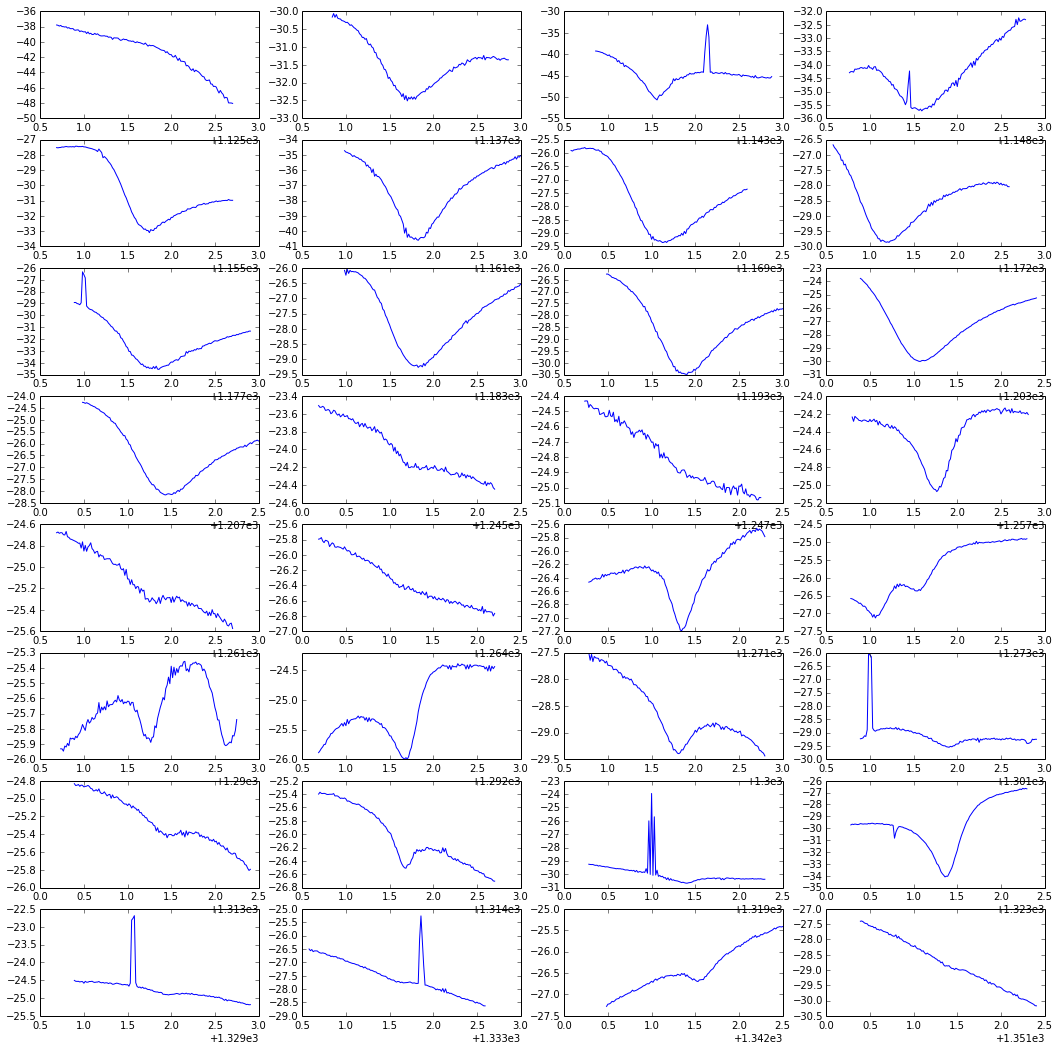

In [10]:
fig,axs = subplots(8,4,figsize=(18,18))
for k in range(32):
    fr,s21,err = swp.select_index(k)
    ax = axs.flatten()[k]
    ax.plot(fr,20*np.log10(np.abs(s21)))

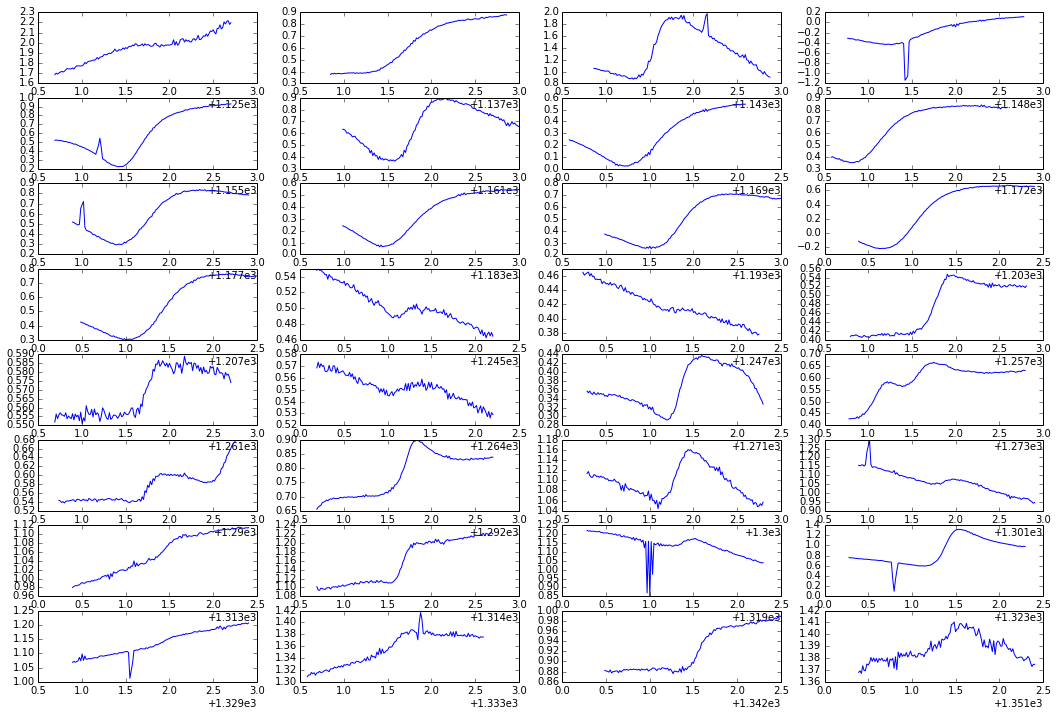

In [83]:
fig,axs = subplots(8,4,figsize=(18,12))
for k in range(32):
    fr,s21,err = swp.select_index(k)
    s21c = s21*np.exp(-2j*np.pi*31.3*fr)
    ax = axs.flatten()[k]
    ax.plot(fr,np.unwrap(np.angle(s21c)))
#    ax.plot(s21c.real,s21c.imag,'.-')

In [84]:
import kid_readout.utils.data_file

In [86]:
df = kid_readout.utils.data_file.DataFile(suffix='jpl_nevins_test_sweep_fitting_data')

In [87]:
df.add_sweep(swp)

'sweep_20151126195648'

In [88]:
df.close()

In [90]:
swp.blocks.__len__()

4160

In [229]:
fr,s21,err = swp.select_index(30)

In [230]:
s21c = s21*np.exp(-2j*np.pi*fr*31.3)

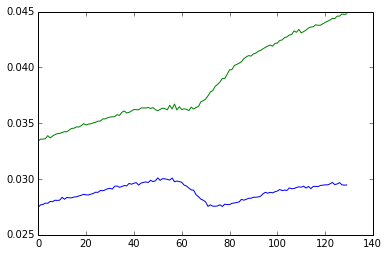

In [231]:
plot(np.real(s21c))
plot(np.imag(s21c))

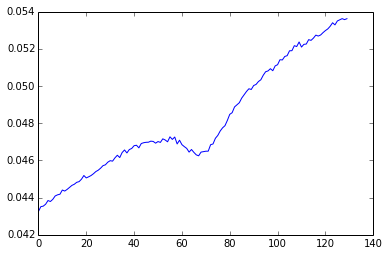

In [232]:
plot(np.abs(s21c))

In [261]:
import kid_readout.analysis.resonator
reload(kid_readout.analysis.resonator)
import kid_readout.analysis.khalil
reload(kid_readout.analysis.khalil)

<module 'kid_readout.analysis.khalil' from '/home/gjones/kid_readout/kid_readout/analysis/khalil.py'>

In [268]:
res = kid_readout.analysis.resonator.Resonator(fr,s21c,errors=err,model=kid_readout.analysis.khalil.resonator_model, guess=kid_readout.analysis.khalil.resonator_guess)

In [263]:
res = kid_readout.analysis.resonator.fit_best_resonator(fr,s21c,errors=err,min_a=1)

In [264]:
def central(x):
    return x[len(x)//4:3*len(x)//4]

In [265]:
res2 = kid_readout.analysis.resonator.fit_best_resonator(central(fr),central(s21c),errors=central(err),min_a=1)

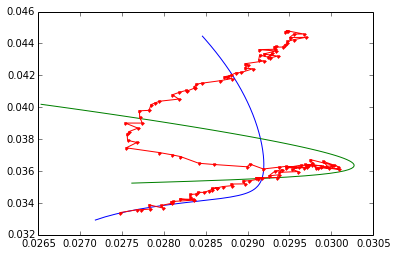

In [269]:
plot(res.model().real,res.model().imag)
plot(res2.model().real,res2.model().imag)
plot(s21c.real,s21c.imag,'.-')

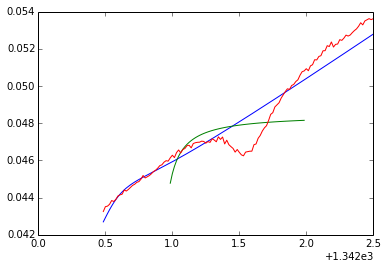

In [270]:
plot(fr,np.abs(res.model()))
plot(res2.freq_data,np.abs(res2.model()))
plot(fr,np.abs(s21c))

In [272]:
mx = np.abs(s21).max()
mn = np.abs(s21).min()

In [276]:
20*np.log10(mx/mn)

1.8667393387756395

In [279]:
20*np.log10(np.abs(s21).std()/np.abs(s21).mean())

-24.161994323467564

In [255]:
fr.mean()/np.diff(fr).min()

85983.5

In [256]:
res.f_0

1340.468753556936

In [257]:
res2.f_0

1341.9843781954432

In [258]:
res2.Q

85982.998408871397

In [259]:
res.Q

85983.483670421789

In [260]:
fr.min()

1342.484375

In [175]:
res.Q_e_real

4783.5508129742684

In [176]:
res.Q_e_imag

-1304.8225396197522

In [165]:
res2.Q_e_real

2852.8394302472225

In [177]:
res.Q_i

1478.351482529238

In [245]:
res.result.params

Parameters([('f_0', <Parameter 'f_0', value=1340.4687500023779 +/- 0.968, bounds=[1340.46875:1346.515625]>), ('A_mag', <Parameter 'A_mag', value=0.062795285638017617 +/- 0.00286, bounds=[0:1000000.0]>), ('A_phase', <Parameter 'A_phase', value=0 (fixed), bounds=[-3.141592653589793:3.141592653589793]>), ('Q', <Parameter 'Q', value=6694897.202682388 +/- 1.03e+11, bounds=[666.53875968992247:10000000.0]>), ('Q_e_real', <Parameter 'Q_e_real', value=399.89825858982584 +/- 469, bounds=[0:1000000.0]>), ('Q_e_imag', <Parameter 'Q_e_imag', value=-701.98727975715883 +/- 1.12e+03, bounds=[-1000000.0:1000000.0]>), ('delay', <Parameter 'delay', value=-0.024242620914678402 +/- 0.0103, bounds=[-inf:inf]>), ('phi', <Parameter 'phi', value=0.58222968327433078 +/- 0.387, bounds=[-3.141592653589793:3.141592653589793]>), ('f_phi', <Parameter 'f_phi', value=1342.484375 (fixed), bounds=[-inf:inf]>)])

In [195]:
ri.set_modulation_output(7)

122.0703125

In [196]:
ri.set_tone_freqs(resonances,nsamp=2**17)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([ 1126.69921875,  1138.859375  ,  1144.87890625,  1149.78125   ,
        1156.69921875,  1163.        ,  1170.1015625 ,  1173.6015625 ,
        1178.8984375 ,  1185.        ,  1195.        ,  1204.3984375 ,
        1208.5       ,  1246.19921875,  1248.25      ,  1258.80859375,
        1262.69921875,  1265.19921875,  1272.30078125,  1274.80078125,
        1291.75      ,  1293.69921875,  1301.80078125,  1302.8984375 ,
        1314.3984375 ,  1315.69921875,  1320.30078125,  1324.30078125,
        1330.8984375 ,  1334.6015625 ,  1343.5       ,  1352.3984375 ])

In [197]:
ri.select_fft_bins(range(32))

In [223]:
ri.set_dac_atten(15)

In [284]:
d,addr = ri.get_data(8)

detected mcnt overflow None 885453 0 65536 0 1264 885453


In [285]:
d.shape

(32768, 32)

In [288]:
ri.fpga_fft_readout_indexes

array([  198,   264,   602,   726,   806,  1034,  1114,  1656,  1718,
        1978,  2013,  2381,  2422,  2570,  2698,  2909,  3027,  3312,
        3597, 12758, 13148, 13340, 13497, 13718, 13920, 14147, 14259,
       14429, 14624, 14944, 15245, 15376])

In [289]:
ri.readout_fft_bins

array([  198,   264,   602,   726,   806,  1034,  1114,  1656,  1718,
        1978,  2013,  2381,  2422,  2570,  2698,  2909,  3027,  3312,
        3597, 12758, 13148, 13340, 13497, 13718, 13920, 14147, 14259,
       14429, 14624, 14944, 15245, 15376])

In [286]:
dr = d.reshape((-1,256,32))

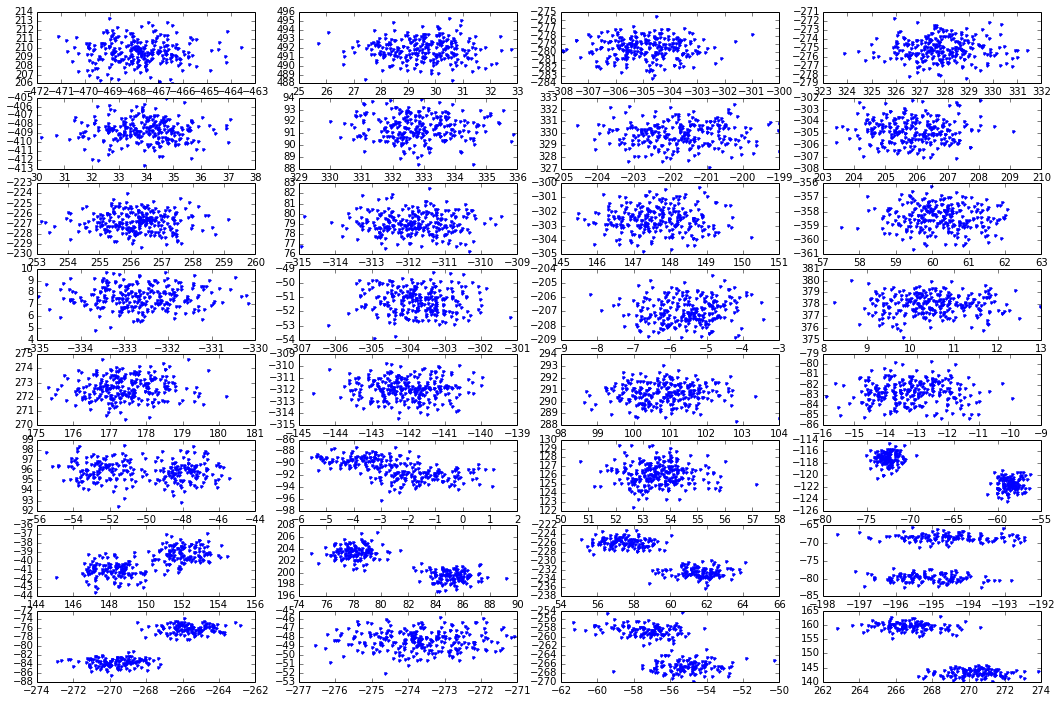

In [287]:
fig,axs = subplots(8,4,figsize=(18,12))
for k in range(32):
    ax = axs.flatten()[k]
    dm = dr[:,:,k].mean(0)
    ax.plot(dm.real,dm.imag,'.')

In [228]:
fr.mean()/fr.ptp()

567.99612403100775

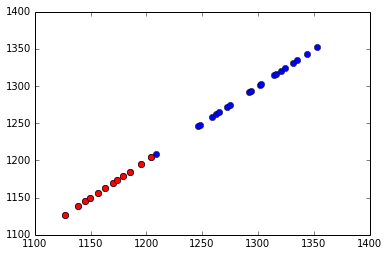

In [290]:
plot(resonances,resonances,'o')
plot(resonances[:12],resonances[:12],'ro')

In [72]:
fr[np.abs(s21d).argmin()]

1316.34375

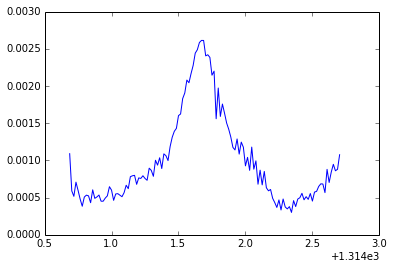

In [73]:
plot(fr,np.abs(s21d))

In [74]:
pfitm = np.polyfit(fr,np.abs(s21c),1)
s21cm = s21c/(np.polyval(pfitm,fr))

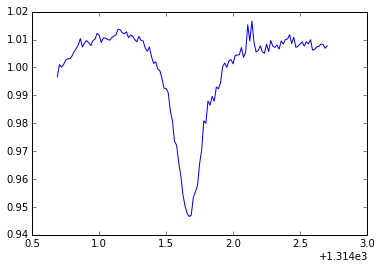

In [75]:
plot(fr,np.abs(s21cm))

In [76]:
res = kid_readout.analysis.resonator.fit_best_resonator(fr,s21cm,errors=err,min_a=1)

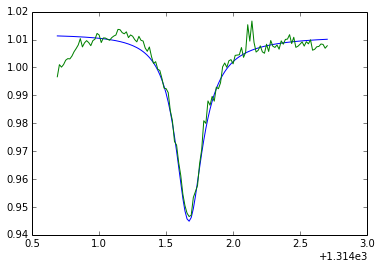

In [77]:
plot(fr,np.abs(res.model()))
plot(fr,np.abs(s21cm))

In [78]:
res.Q

5297.1816916030921

In [79]:
res.Q_i

5670.9278075848633

In [80]:
res.Q_e_real

79850.715140798333

In [81]:
res.f_0

1315.6647411852423

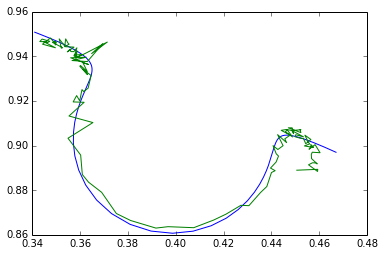

In [82]:
plot(res.model().real,res.model().imag)
plot(s21cm.real,s21cm.imag)

In [25]:
blk = swp.blocks[0]

In [26]:
blk.lo

1130.0

In [27]:
blk.zbd_voltage

0.0

In [21]:
ri.set_tone_freqs(np.array([1116.5]),nsamp=2**16)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([ 1116.5])

In [22]:
ri.set_modulation_output(7)

122.0703125

In [23]:
d,addr = ri.get_data(16)

In [15]:
d.shape

(65536, 1)

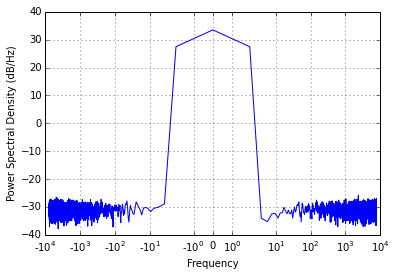

In [24]:
blah = psd(d[:,0],NFFT=8192,Fs=256e6/2**14)
xscale('symlog')